# Restaurant Delivery Time Prediction

### Task_3:
1. Convert the problem into classification problem by seeing pattern in training set.

### Team Name: The Brown Coders
1. Yashowardhan Shinde
2. Aryan Kenchappagol
3. Akalbir Singh Chadha

#### Aim: Predict the delivery time of a restaurant depending on different factors.
#### Importing the necessary pacakges for data visualization and analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset and checking the type of data in the data frame.

In [2]:
df = pd.read_excel("data_train.xlsx")
df.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [3]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


### We can observe the data is not in numerical format.
#### Converting this data into numerical format and cleaning the data.
1. Removing NULL values from Different columns.
2. Filling the cells with - with the mean of that column.

In [4]:
# Drop the New Restaurants with no data
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 5] == "NEW":
        df.drop(index = [i], inplace = True)
df.head(10)
df.index = [i for i in range(len(df))]
#df.index

# Average_Cost Column
# avg_cost = set(df["Average_Cost"])
avg_cost = list(df["Average_Cost"])
for i in range(len(df)):
    if len(avg_cost[i]) == 6:
        avg_cost[i] = int(avg_cost[i][1]+avg_cost[i][3:])
    else:
        avg_cost[i] = int(avg_cost[i][1:])
df["Average_Cost"] = avg_cost
#df.head()


# Minimum_Cost Column
# Removing the prefix
min_cost = set(df["Minimum_Order"])
min_cost = list(df["Minimum_Order"])

for i in range(len(df)):
    min_cost[i] = int(min_cost[i][1:])
    
df["Minimum_Order"] = min_cost
#df.head()


# Votes and Reviews Column:
# These columns have - values therefore convert them to int (0)
# Reiterate over the column and assign the cell with value 0 mean value of that column
x = list(df["Votes"])
y = list(df["Reviews"])
for i in range(0, len(x)):
    try:
        x[i] = int(x[i])
    except:
        x[i] = 0
    
for i in range(0, len(y)):
    try:
        y[i] = int(y[i])
    except:
        y[i] = 0
        
ex_x = x.count(0)
ex_y = y.count(0)
mean_x = int(sum(x)/(len(x)-ex_x))
mean_y = int(sum(y)/(len(y)-ex_y))

for j in range(len(x)):
    if x[j] == 0:
        x[j] = mean_x

for j in range(len(y)):
    if y[j] == 0:
        y[j] = mean_y
        
#ex_x = x.count(0)
#ex_y = y.count(0)
#ex_x, ex_y

df["Votes"] = x
df["Reviews"] = y
#df.head(10)

# Delivery_Time Column:
# Time is in form of string so removing the prefix and conerting it to int data
time = list(df["Delivery_Time"])
for i in range(len(df)):
    time[i] = int(time[i][:2])
    
df["Delivery_Time"] = time 
#df.head()

# Location Column:
# There are 35 different location therefore One Hot Encoding is not a practical option
# Converting it to numerial data with each location having a unique numerical value
# 1-35
loc = list(set(df["Location"]))
map_loc = {}

for i in range(len(loc)):
    map_loc[loc[i]] = i+1
    
#map_loc
loc = list(df["Location"])

for i in range(0, len(df)):
    loc[i] = map_loc[loc[i]]
    
df["Location"] = loc
#df.head(10)


# Cuisine Column:
# The individual cuisines cannot be analysed therefore converting it to a numerical quantity
# Instead of individual cuisines considering the number of cuisines a restaurant serves
food = list(df["Cuisines"])

for i in range(len(food)):
    x = list(food[i].split(", "))
    food[i] = len(x)
    
df["Cuisines"] = food


# Rating Column
# This column has many string values along with numerical data
# Dropping the string data rows
d = list(set(df["Rating"]))
d.sort()
for i in range(len(df)-1,0,-1):
    if df.iloc[i, 5] == d[-1] or df.iloc[i, 5] == d[-2] or df.iloc[i, 5] == d[0]:
        df.drop(i, inplace = True)
        
d = list(set(df["Rating"]))
d.sort()

d = list(df["Rating"])
d = list(map(float, d))
df["Rating"] = d
df.dropna(inplace = True)
df.index = [i for i in range(len(df))]

df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,24,5,200,50,3.5,12,4,30
1,ID_2882,12,2,100,50,3.5,11,4,30
2,ID_1595,2,3,150,50,3.6,99,30,65
3,ID_5929,22,3,250,99,3.7,176,95,30
4,ID_6123,10,2,200,99,3.2,521,235,65
5,ID_5221,10,3,150,50,3.8,46,18,30
6,ID_3777,2,2,150,50,3.7,108,31,30
7,ID_745,16,3,650,50,4.0,1731,1235,45
8,ID_2970,16,2,100,50,3.9,110,26,30
9,ID_3474,22,6,200,50,3.9,562,294,65


## Data Visualization:

#### Scatter Plot:

   Plot a scatter plot of Delivery Time with every other quantity to find relations between those quantities.
 

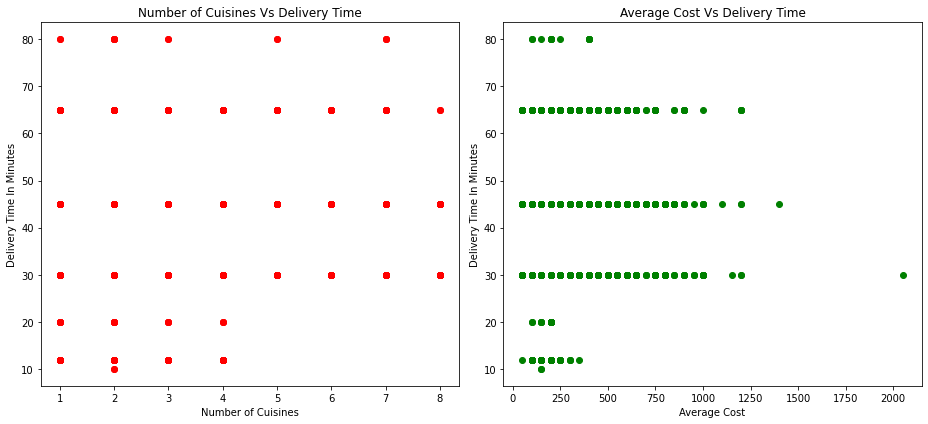

In [5]:
fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
x = list(df["Cuisines"])
y = list(df["Delivery_Time"])
plt.scatter(x, y, color = 'r')
plt.xlabel("Number of Cuisines")
plt.ylabel("Delivery Time In Minutes")
plt.title("Number of Cuisines Vs Delivery Time")

#plt.show()

plt.subplot(1,2,2)
x1 = list(df["Average_Cost"])
y1 = list(df["Delivery_Time"])
plt.scatter(x1, y1, color = 'g')
plt.xlabel("Average Cost")
plt.ylabel("Delivery Time In Minutes")
plt.title("Average Cost Vs Delivery Time")
plt.tight_layout()
plt.show()

[]

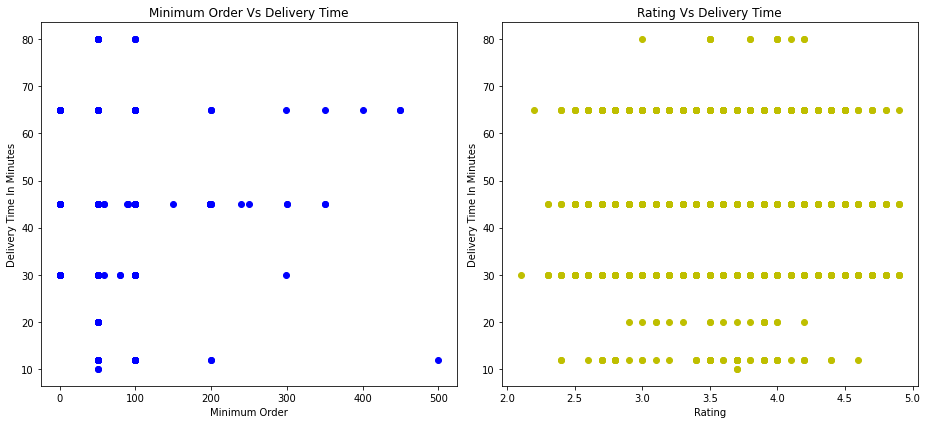

In [6]:
fig = plt.figure(figsize =(13,6))
plt.subplot(1,2,1)
x = list(df["Minimum_Order"])
y = list(df["Delivery_Time"])
plt.scatter(x, y, color = 'b')
plt.xlabel("Minimum Order")
plt.ylabel("Delivery Time In Minutes")
plt.title("Minimum Order Vs Delivery Time")
#plt.plot()

plt.subplot(1,2,2)
x = list(df["Rating"])
y = list(df["Delivery_Time"])
plt.scatter(x, y, color = 'y')
plt.xlabel("Rating")
plt.ylabel("Delivery Time In Minutes")
plt.title("Rating Vs Delivery Time")
plt.tight_layout()
plt.plot()

[]

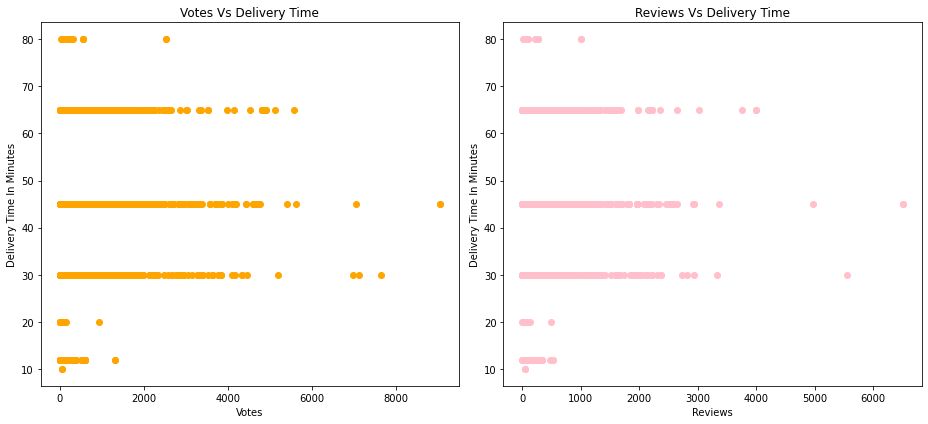

In [7]:
fig = plt.figure(figsize =(13, 6))
plt.subplot(1,2,1)
x = list(df["Votes"])
y = list(df["Delivery_Time"])
plt.scatter(x, y, color = 'orange')
plt.xlabel("Votes")
plt.ylabel("Delivery Time In Minutes")
plt.title("Votes Vs Delivery Time")
plt.plot()

plt.subplot(1,2,2)
x = list(df["Reviews"])
y = list(df["Delivery_Time"])
plt.scatter(x, y, color = 'pink')
plt.xlabel("Reviews")
plt.ylabel("Delivery Time In Minutes")
plt.title("Reviews Vs Delivery Time")
plt.tight_layout()
plt.plot()

**We can see in all the scatter plot that there isn't a Linear Relation between Delivery Time and other quantities so Linear Regression is not an option here we will have to choose some other model to predict the Delivery Time**

### Heatmap:
The heat map will give a clear idea of how different quantities aredependent on each other.

[]

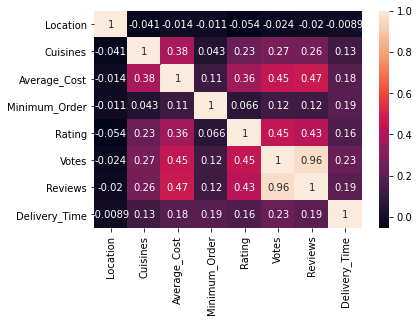

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.plot()

**As we can see from the heat map above the delivery time is not dependent on the location so we can drop this column and we also observe that Reviews and Votes have a very high relation so both the columns will have similar effect on delivery time so we can drop one of the columns here I will drop the Reviews**

In [9]:
df.drop(columns=["Location", "Reviews"], inplace = True)
df.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time
0,ID_6321,5,200,50,3.5,12,30
1,ID_2882,2,100,50,3.5,11,30
2,ID_1595,3,150,50,3.6,99,65
3,ID_5929,3,250,99,3.7,176,30
4,ID_6123,2,200,99,3.2,521,65


### Box Plot:
Using the box plot we can get to know about the outliers in our dataset and we can remove these outliers

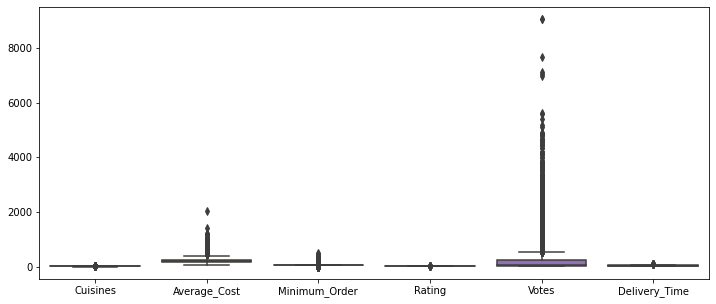

In [10]:
figure = plt.figure(figsize = (12, 5))
sns.boxplot(data = df.iloc[:, 1:7])
plt.show()

**From the above boxplot it is clear that there are many outliers and these need to be fixed so we will remove all the outlier values**

In [11]:
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 4] > 130 or df.iloc[i, 2] > 300 or df.iloc[i, 5] > 78 or df.iloc[i, 3] > 100:
        df.drop(index = i, inplace = True)
       

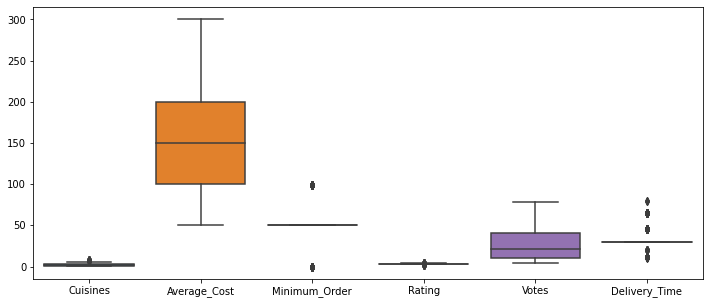

In [12]:
figure = plt.figure(figsize = (12, 5))
sns.boxplot(data = df.iloc[:, 1:7])
plt.show()

**After removing most of the outliers the box plot looks like the one above graph we have a few outliers in the Minimum Order category and Delivery time but we won't do anything about these as Delivery Time is Our Target Variable.**

**From the above graphs like the scatter plots it is observed that we can segregate the data into 4-5 categories and so we will convert out delivery time column into categorical data**

1. Category 1: 0  <= Time <= 29
2. Category 2: 30 <= Time <= 39
3. Category 3: 40 <= Time <= 59
4. Category 4: 60 <= Time

In [13]:
for i in range(len(df)-1, -1, -1):
    if 0 <= df.iloc[i, 6] <= 29:
        df.iloc[i, 6] = 0
    elif 30 <= df.iloc[i, 6] <= 39:
        df.iloc[i, 6] = 1
    elif 40 <= df.iloc[i, 6] <= 59:
        df.iloc[i, 6] = 2
    elif 60 <= df.iloc[i, 6]:
        df.iloc[i, 6] = 3

### Data Preparation for Feeding the Data to our Model:

Using the Train Test Split Model From Sklearn library we will divide the Data In ratio 2:1 that is 67% training data and 33% testing data.

In [14]:
X = df.iloc[:, 1:6].values
#X = X.reshape(-1,1)
Y = df.iloc[:, 6].values
df.head()

from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

### Selecting a Model for our Data:

**Available Models:**

1. KNN
2. Naive Bayes
3. Logistic Regression
4. SVM
5. Decision Tree
6. Random Forest

**We will be checking accurracy of all the available models and choose the one with Highest Accuracy and Lowest MAE Score.**

**It is expected that Decision Tree and Random Forest would be the best fit for the available data.** 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()

0.2708860759493671

The accuracy of the classifier is: 0.7810126582278482


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**We can observe that we get an accuracy of about 78% and a MAE Score of 0.27 using KNN. Now we will check the accuracy using a Naive Bayes Classifier.**

In [16]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()


0.2639240506329114

The accuracy of the classifier is: 0.7987341772151899


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**We can observe that we get an accuracy of about 79% and a MAE Score of 0.26 using Naive Bayes. Now we will check the accuracy using a Logistic Regression Classifier.**

In [17]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty="l2")
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()


0.2310126582278481

The accuracy of the classifier is: 0.8094936708860759


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**We can observe that we get an accuracy of about 81% and a MAE Score of 0.23 using Logistic Regression. Now we will check the accuracy using a SVM.**

In [18]:
from sklearn import svm

classifier = svm.SVC()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()


0.2468354430379747

The accuracy of the classifier is: 0.8063291139240506


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**We can observe that we get an accuracy of about 80% and a MAE Score of 0.24 using SVM. Now we will check the accuracy using a Desicion Tree.**

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

pred = dtree.predict(x_test)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

mae = metrics.mean_absolute_error(y_test, pred)
print('\nThe Mean Absolute Error of the classifier is:', mae)

acc = dtree.score(x_test, y_test)
print('\nThe accuracy of the classifier is:', acc)

comp.head()


The Mean Absolute Error of the classifier is: 0.28164556962025317

The accuracy of the classifier is: 0.769620253164557


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**We can observe that we get an accuracy of about 77% and a MAE Score of 0.27 using a Desicion Tree. Now we will check the accuracy using a Random Forest Classifier which are considered to be more robust than a Desicion Tree.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=120)
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()

0.21772151898734177

The accuracy of the classifier is: 0.8215189873417722


,Original,Predicted,Diff
0,1,1,0
1,1,1,0
2,1,1,0
3,3,1,2
4,1,1,0


**And as we can clearly see that the Random Forest Gives a better Accuracy of about 82% and a better MAE Score of 0.217 so, we will be using the Random Forest Classifier for this Prediction Task**

### Unsupervised Machine Learning for Analysing the possible solutions for the Problem:

Trying to find out if there is any categorical pattern that we are missing we will plot a elbow graph to find the optimum number of clusters for our dataset and then use it to determine the clusters using a scatter plot

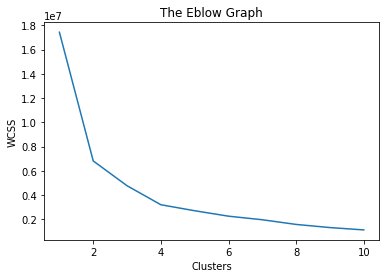

In [21]:
x = df.iloc[:, 1:6].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

plt.plot([i for i in range(1, 11)], wcss)
plt.title('The Eblow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**We can observe that there is a sharp drop in the WCSS at 4 and so, we will take the optimum number of clusters to be 4 clusters**

**Now Trying to solve this problem using Clustering Algorithm**

### Preparing Hierarchical Clustering Model:

### Hierarchical Clustering:
It is one of the most accurate ways to find any categorical patterns in unsuervised learning we will create a model using this clustering method and try to visualize it.

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
pred = cluster.fit_predict(x)
pred
df['Categories'] = pred
df.head()
len(df)

4786

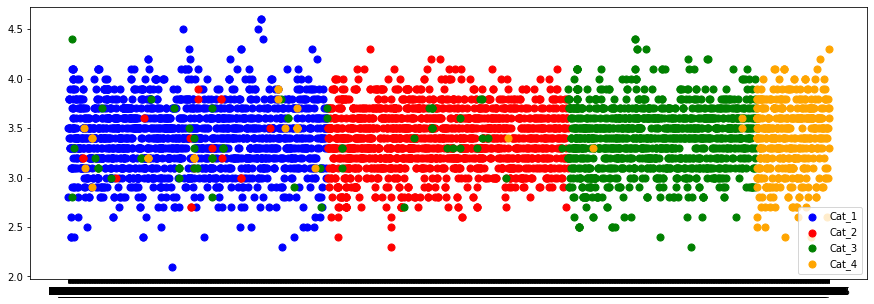

In [23]:
df_0 = df[df['Categories'] == 0]
df_1 = df[df['Categories'] == 1]
df_2 = df[df['Categories'] == 2]
df_3 = df[df['Categories'] == 3]
#df_4 = df[df['Categories'] == 4]

plt.figure(figsize=(15,5))

plt.scatter(df_0.iloc[:, 0], df_0.iloc[:, 4] , color = 'b', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 4] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 4] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(df_3.iloc[:, 0], df_3.iloc[:, 4] , color = 'orange', label = 'Cat_4', s= 50)

#plt.scatter(df_4.iloc[:, 0], df_4.iloc[:, 4] , color = 'purple', label = 'Cat_5', s= 50)

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'y', label = 'Centroids', s = 100)

plt.legend()
plt.show()

**It can be seen that this problem of Delivery Time Prediction Can be solved using clustering method as the data is segregated into 4 clusters.**